#### Assumptions made/issues/observations found, please review and advise: 

####   Well header dataset
      -Assumed 'Not Applicable' values as null values. See Line 2 of Code. Agreed
      -Changed some objects to category data types. See line 7 of Code. Waiting for confirmation.
      -Columns dropped. See Line 20 of Code. Waiting for confirmation.
      -BH Longitude/Latitude values missing and they correspond to British Columbia data. See corresponding html file and          Line 3 of code.
      
####    Production dataset - Require review and input
      -Filled null values with zero(0) for pivoted dataframes.See codes Line 32,35, 38 and 42. Waiting for input.
      -Duplicate rows created after pivoting data. See corresponding html files. Waiting for input.
      
####    Perforation dataset
      -ActivityType column values(46) missing. See corresponding html file and Line 17 of code.
      -Added a Completion Activity (Yes or No) column to the perforation dataset. See Line 18 and 19.

     

# Import Libraries

In [1]:
import pandas as pd
import numpy as np
import sweetviz as sv

## Get the data

In [2]:
## add list of datecolumns to parse_date to ensure datetime datatypes
## assumed 'Not Applicable' values are NA values

datecolumns = ['LicenceDate', 'ConfidentialReleaseDate','AbandonDate', 'SurfAbandonDate', 'SpudDate', 'FinalDrillDate', 'RigReleaseDate','StatusDate','CompletionDate']   
well_header = pd.read_csv(r"C:\Users\ijeke\Documents\Datathon\Complete set\WellHeader_Datathon.csv",parse_dates=datecolumns, low_memory=False, na_values='Not Applicable')
well_production = pd.read_csv(r"C:\Users\ijeke\Documents\Datathon\Complete set\WellProduction.csv", parse_dates=['ProdPeriod'])
perf_treatment = pd.read_csv(r"C:\Users\ijeke\Documents\Datathon\Complete set\PerfTreatments.csv", parse_dates=['ActivityDate'])

In [3]:
well_header=well_header.iloc[:,0:85]
well_header.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10437 entries, 0 to 10436
Data columns (total 85 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   EPAssetsId                 10437 non-null  int64         
 1   Province                   10437 non-null  object        
 2   LicenceNumber              10437 non-null  object        
 3   UWI                        10437 non-null  object        
 4   CurrentOperator            10437 non-null  object        
 5   CurrentOperatorParent      10437 non-null  int64         
 6   CurrentOperatorParentName  10437 non-null  object        
 7   Licensee                   10437 non-null  object        
 8   LicenseeParentCompany      10437 non-null  int64         
 9   LicenseeParentCompanyName  10437 non-null  object        
 10  LicenceDate                10437 non-null  datetime64[ns]
 11  CurrentStatus              10437 non-null  object        
 12  Curr

In [4]:
display(well_production.info())

print('\n')

perf_treatment.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 961054 entries, 0 to 961053
Data columns (total 5 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   EPAssetsId        961054 non-null  int64         
 1   ProdPeriod        961054 non-null  datetime64[ns]
 2   ProdType          961054 non-null  object        
 3   Volume            961054 non-null  float64       
 4   WellHeader.Match  961054 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(2)
memory usage: 36.7+ MB


None



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 445271 entries, 0 to 445270
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   EPAssetsId         445271 non-null  int64         
 1   EPAPTId            445271 non-null  int64         
 2   ObservationNumber  370719 non-null  float64       
 3   ActivityDate       445271 non-null  datetime64[ns]
 4   ActivityType       445225 non-null  object        
 5   IntervalTop        445271 non-null  float64       
 6   IntervalBase       445271 non-null  float64       
 7   PerfShots          370719 non-null  float64       
 8   WellHeader.Match   445271 non-null  object        
dtypes: datetime64[ns](1), float64(4), int64(2), object(2)
memory usage: 30.6+ MB


In [5]:
well_header.head(2)

,EPAssetsId,Province,LicenceNumber,UWI,CurrentOperator,CurrentOperatorParent,CurrentOperatorParentName,Licensee,LicenseeParentCompany,LicenseeParentCompanyName,...,PSACAreaCode,PSACAreaName,ProjectedDepth,StatusDate,StatusSource,UnitID,UnitName,UnitFlag,Municipality,CompletionDate
0,2587301,Alberta,475898,100122706624W500,Enerplus Corporation,267,Enerplus Corporation,Enerplus Corporation,267,Enerplus Corporation,...,AB2,Foothills Front,3800.0,2016-02-28,AER,NaN,NaN,No,NaN,NaT
1,2593278,Alberta,479407,102052706624W500,Enerplus Corporation,267,Enerplus Corporation,Enerplus Corporation,267,Enerplus Corporation,...,AB2,Foothills Front,3700.0,2016-09-23,AER,NaN,NaN,No,NaN,NaT


In [6]:
##check which columns are object datatypes 

well_header.columns[well_header.dtypes == 'object']



Index(['Province', 'LicenceNumber', 'UWI', 'CurrentOperator',
       'CurrentOperatorParentName', 'Licensee', 'LicenseeParentCompanyName',
       'CurrentStatus', 'CurrentStatusStandardised', 'WellType',
       'WellTypeStandardised', 'WellName', 'Formation', 'Field', 'Pool',
       'SurveySystem', 'Surf_Location', 'Surf_Meridian', 'Surf_TownshipRange',
       'Surf_QuarterUnit', 'Surf_Block', 'Surf_NTSMapSheet', 'Surf_Area',
       'Surf_QuarterSection', 'BH_Location', 'BH_TownshipRange',
       'BH_QuarterUnit', 'BH_Block', 'BH_NTSMapSheet', 'BH_Area',
       'BH_QuarterSection', 'BH_Meridian', 'LaheeClass', 'Confidential',
       'SurfaceOwner', 'OSArea', 'DrillingContractor', 'WellProfile',
       'Country', 'RegulatoryAgency', 'PSACAreaCode', 'PSACAreaName',
       'StatusSource', 'UnitID', 'UnitName', 'UnitFlag', 'Municipality'],
      dtype='object')

In [7]:
## Select objects to convert to category type 
obj_cast_category = ['Province', 'CurrentOperator', 'CurrentOperatorParentName',
       'Licensee', 'LicenseeParentCompanyName', 'CurrentStatus',
       'CurrentStatusStandardised', 'WellType', 'WellTypeStandardised',
       'Formation', 'Field', 'Pool', 'SurveySystem',
       'Surf_Meridian', 
       'Surf_QuarterUnit',  'Surf_Block', 'Surf_NTSMapSheet',
       'Surf_Area',  'Surf_QuarterSection',
       'BH_Location', 'BH_QuarterUnit', 
       'BH_Block', 'BH_NTSMapSheet', 'BH_Area', 
       'BH_QuarterSection', 'BH_Meridian', 'LaheeClass', 'Confidential',
       'SurfaceOwner', 'OSArea', 'OSDeposit', 'DrillingContractor',
       'WellProfile', 'Country', 'RegulatoryAgency', 'PSACAreaCode',
       'PSACAreaName', 'StatusSource', 'UnitFlag','Municipality']       


well_header[obj_cast_category] = well_header[obj_cast_category].astype('category')

well_header.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10437 entries, 0 to 10436
Data columns (total 85 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   EPAssetsId                 10437 non-null  int64         
 1   Province                   10437 non-null  category      
 2   LicenceNumber              10437 non-null  object        
 3   UWI                        10437 non-null  object        
 4   CurrentOperator            10437 non-null  category      
 5   CurrentOperatorParent      10437 non-null  int64         
 6   CurrentOperatorParentName  10437 non-null  category      
 7   Licensee                   10437 non-null  category      
 8   LicenseeParentCompany      10437 non-null  int64         
 9   LicenseeParentCompanyName  10437 non-null  category      
 10  LicenceDate                10437 non-null  datetime64[ns]
 11  CurrentStatus              10437 non-null  category      
 12  Curr

In [8]:
# change ProdType and ActivityType columns from object to category datatype
well_production['ProdType'] = well_production['ProdType'].astype('category')
perf_treatment['ActivityType'] = perf_treatment['ActivityType'].astype('category')

## Seewtviz Magic

In [9]:
 wh= sv.analyze(well_header)

:FEATURES DONE:                    |█████████████████████| [100%]   00:17  -> (00:00 left)
:PAIRWISE DONE:                    |█████████████████████| [100%]   00:23  -> (00:00 left)


Creating Associations graph... DONE!


In [10]:
wh.show_html('wells.html')

Report wells.html was generated! NOTEBOOK/COLAB USERS: no browser will pop up, the report is saved in your notebook/colab files.


In [11]:
well_production=well_production.iloc[:,0:4]

In [12]:
well_production.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 961054 entries, 0 to 961053
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   EPAssetsId  961054 non-null  int64         
 1   ProdPeriod  961054 non-null  datetime64[ns]
 2   ProdType    961054 non-null  category      
 3   Volume      961054 non-null  float64       
dtypes: category(1), datetime64[ns](1), float64(1), int64(1)
memory usage: 22.9 MB


In [13]:
 wp= sv.analyze(well_production)

:FEATURES DONE:                    |█████████████████████| [100%]   00:30  -> (00:00 left)
:PAIRWISE DONE:                    |█████████████████████| [100%]   00:19  -> (00:00 left)


Creating Associations graph... DONE!


In [14]:
wp.show_html('wells_production.html')

Report wells_production.html was generated! NOTEBOOK/COLAB USERS: no browser will pop up, the report is saved in your notebook/colab files.


In [15]:
perf_treatment=perf_treatment.iloc[:,0:8]

In [16]:
perf_treatment.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 445271 entries, 0 to 445270
Data columns (total 8 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   EPAssetsId         445271 non-null  int64         
 1   EPAPTId            445271 non-null  int64         
 2   ObservationNumber  370719 non-null  float64       
 3   ActivityDate       445271 non-null  datetime64[ns]
 4   ActivityType       445225 non-null  category      
 5   IntervalTop        445271 non-null  float64       
 6   IntervalBase       445271 non-null  float64       
 7   PerfShots          370719 non-null  float64       
dtypes: category(1), datetime64[ns](1), float64(4), int64(2)
memory usage: 24.2 MB


In [17]:
perf_treatment['ActivityType'].unique()

[Perforation, Fracture, Hydraulic Fracture, Sand Fracture, Open Hole, ..., Packing Device Capped w/Cement, Chemical Squeeze, Casing Patch, Acid Treatment, Multi-Stage Fracture]
Length: 26
Categories (25, object): [Perforation, Fracture, Hydraulic Fracture, Sand Fracture, ..., Chemical Squeeze, Casing Patch, Acid Treatment, Multi-Stage Fracture]

In [18]:
## create perf activity type dictionary to classify as Completion Activity (Yes or No) based on our assumptions

perf_activity_dict = {'Perforation': 'Yes',
 'Fracture': 'Yes',
 'Hydraulic Fracture': 'Yes',
 'Sand Fracture': 'Yes',
 'Open Hole': 'No',
 'Chemical Fracture': 'Yes',
 'Other' : 'No',
 'Acid Squeeze' : 'Yes',
 'Bridge Plug Set' : 'No',
 'Acid Wash' : 'Yes',
 'Acidize' : 'Yes',
 'Remedial' : 'No',
 'Cement Squeeze' : 'No',
'Hydra Jet Perforation': 'Yes',
 'Slotted Liner' : 'Yes',
 'Open Hole/Barefoot Completion' : 'Yes',
 'Remedial Casing Cementing' : 'No',
 'Cement Plug' : 'Yes',
 'Multi-Stage Fracture - Port Closed': 'Yes',
 'Bridge Plug - No Cement' : 'No',
 'Packing Device Capped w/Cement' : 'Yes',
 'Chemical Squeeze': 'Yes',
 'Casing Patch' : 'No',
 'Acid Treatment' : 'Yes',
 'Multi-Stage Fracture': 'Yes'}

print(perf_activity_dict)


{'Perforation': 'Yes', 'Fracture': 'Yes', 'Hydraulic Fracture': 'Yes', 'Sand Fracture': 'Yes', 'Open Hole': 'No', 'Chemical Fracture': 'Yes', 'Other': 'No', 'Acid Squeeze': 'Yes', 'Bridge Plug Set': 'No', 'Acid Wash': 'Yes', 'Acidize': 'Yes', 'Remedial': 'No', 'Cement Squeeze': 'No', 'Hydra Jet Perforation': 'Yes', 'Slotted Liner': 'Yes', 'Open Hole/Barefoot Completion': 'Yes', 'Remedial Casing Cementing': 'No', 'Cement Plug': 'Yes', 'Multi-Stage Fracture - Port Closed': 'Yes', 'Bridge Plug - No Cement': 'No', 'Packing Device Capped w/Cement': 'Yes', 'Chemical Squeeze': 'Yes', 'Casing Patch': 'No', 'Acid Treatment': 'Yes', 'Multi-Stage Fracture': 'Yes'}


In [19]:
# merge new table to existing perftreatment table
perf_treatment['CompletionActivity'] = perf_treatment['ActivityType'].map(perf_activity_dict)

In [20]:
pt=sv.analyze(perf_treatment)

:FEATURES DONE:                    |█████████████████████| [100%]   00:41  -> (00:00 left)
:PAIRWISE DONE:                    |█████████████████████| [100%]   00:03  -> (00:00 left)


Creating Associations graph... DONE!


In [21]:
pt.show_html('perf_treatment.html')

Report perf_treatment.html was generated! NOTEBOOK/COLAB USERS: no browser will pop up, the report is saved in your notebook/colab files.


In [22]:
perf_treatment.head()

,EPAssetsId,EPAPTId,ObservationNumber,ActivityDate,ActivityType,IntervalTop,IntervalBase,PerfShots,CompletionActivity
0,2598013,3679026,2.0,2017-01-19,Perforation,2263.0,2263.5,20.0,Yes
1,2599020,3680087,2.0,2017-01-18,Perforation,1435.0,1435.5,20.0,Yes
2,2585063,3681132,2.0,2015-02-14,Perforation,1794.0,1794.5,20.0,Yes
3,2589680,3682967,2.0,2015-11-08,Perforation,1878.0,1878.5,20.0,Yes
4,2590441,3695025,2.0,2016-08-09,Perforation,1957.0,1957.5,20.0,Yes


## Clean data 

In [23]:
##create list of columns to be dropped

dropcols_wellheader= ['CompletionDate','UnitID', 'UnitFlag', 'UnitName', 'Confidential', 'RegulatoryAgency', 'ConfidentialReleaseDate', 'AbandonDate', 'SurfAbandonDate', 'OSArea', 'OSDeposit', 'Municipality', 'CurrentStatus']

print('well columns to drop as follows:' + ' ')
print(dropcols_wellheader)

well columns to drop as follows: 
['CompletionDate', 'UnitID', 'UnitFlag', 'UnitName', 'Confidential', 'RegulatoryAgency', 'ConfidentialReleaseDate', 'AbandonDate', 'SurfAbandonDate', 'OSArea', 'OSDeposit', 'Municipality', 'CurrentStatus']


In [24]:
## drop columns selected
well_header_df = well_header.drop(columns=dropcols_wellheader, axis=1, inplace=False)

## Check number of rows and columns
well_header_df.shape

(10437, 72)

## Create venn diagram showing intersection between datasets

In [25]:
#Import libraries
from matplotlib_venn import venn2, venn2_circles, venn2_unweighted
from matplotlib_venn import venn3, venn3_circles
from matplotlib import pyplot as plt
%matplotlib inline

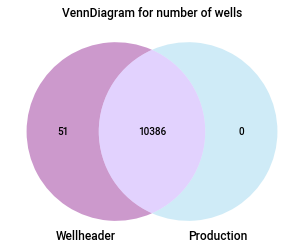

In [26]:
#venn diagram showing intersection of EPAssetsId between Wellheader and Production
venn2_unweighted([set(well_header_df['EPAssetsId']), set(well_production['EPAssetsId'])], set_labels=['Wellheader', 'Production'], set_colors=['purple', 'skyblue'])
#c=venn2_circles([set(well_header_df['EPAssetsId']), set(perf_treatment['EPAssetsId']), set(well_production['EPAssetsId'])], linestyle='dotted', linewidth=1)

plt.title('VennDiagram for number of wells')
plt.show()

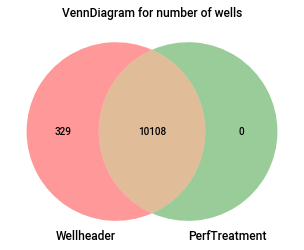

In [27]:
#venn diagram showing intersection of EPAssetsId between Wellheader and PerfTreatment
venn2_unweighted([set(well_header_df['EPAssetsId']), set(perf_treatment['EPAssetsId'])], set_labels=['Wellheader', 'PerfTreatment'])
plt.title('VennDiagram for number of wells')
plt.show()

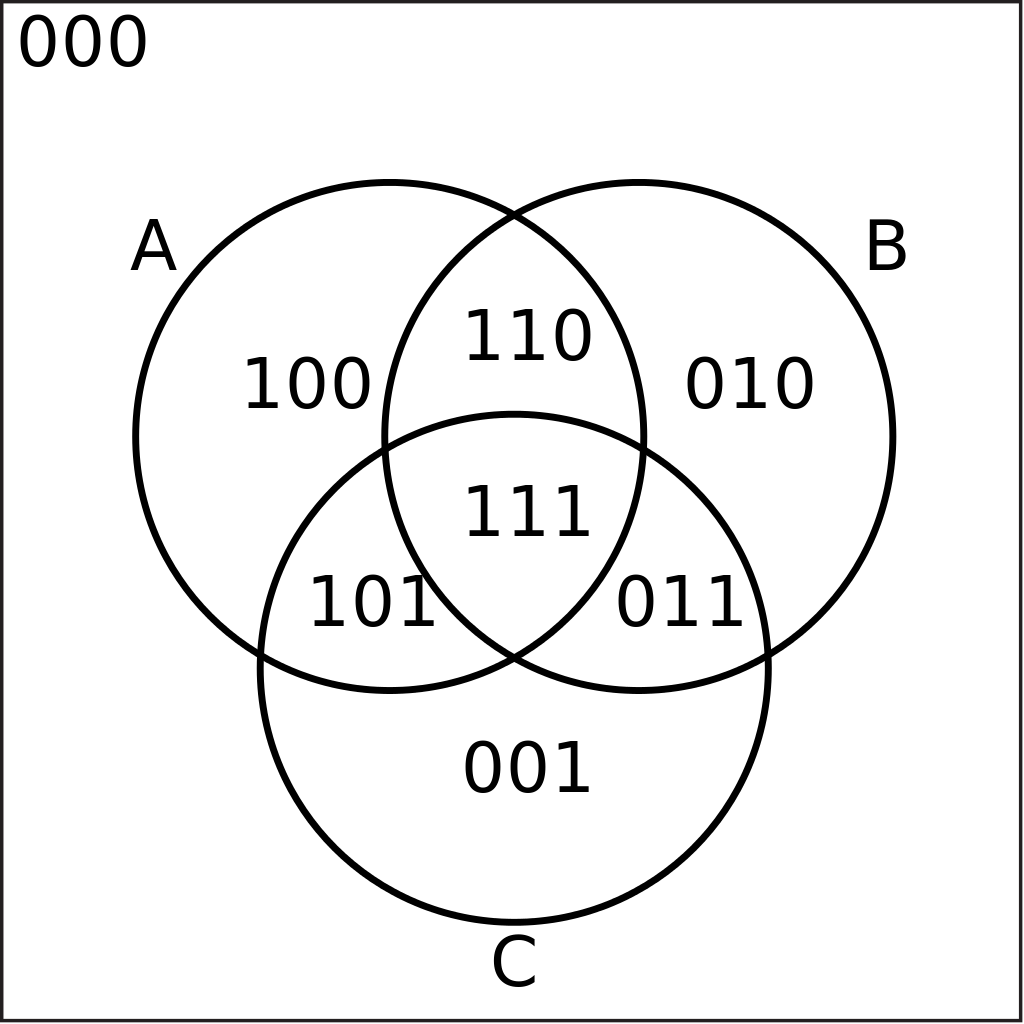

In [28]:
#### Display truth table as venn diagram gotten from 
### Wikepedia at https://en.wikipedia.org/wiki/Venn_diagram#/media/File:Venn3tab.svg to help intrepret chart below. 

from IPython.display import Image
Image(filename="1024px-Venn3tab.svg.png", width=150, height=150)

C:\Users\ijeke\Anaconda3\envs\geo_env\lib\site-packages\matplotlib_venn\_venn3.py:117: UserWarning: Bad circle positioning
  warnings.warn("Bad circle positioning")


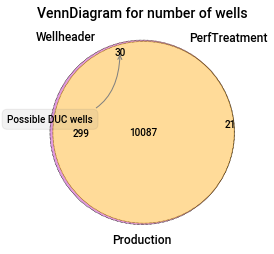

In [29]:
## venn diagram showing intersection of EPAssetsId between Wellheader, Perforation and Production datasets
v=venn3([set(well_header_df['EPAssetsId']), set(perf_treatment['EPAssetsId']), set(well_production['EPAssetsId'])], set_labels=['Wellheader', 'PerfTreatment', 'Production'])
c=venn3_circles([set(well_header_df['EPAssetsId']), set(perf_treatment['EPAssetsId']), set(well_production['EPAssetsId'])], linestyle='dotted', linewidth=0.5)
plt.title('VennDiagram for number of wells', fontsize=14)

#https://en.wikipedia.org/wiki/Venn_diagram (reference for calling id for the venn diagram for customization)
v.get_patch_by_id('111').set_color('orange')
plt.annotate('Possible DUC wells', xy=v.get_label_by_id('100').get_position(),xytext=(-70,-70),
ha='center', textcoords='offset points', bbox=dict(boxstyle='round,pad=0.5', fc='gray', alpha=0.1),
arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=0.5',color='gray'))

plt.show()
##plt.savefig('Venn diagram for number of wells in datasets.jpg', dpi=150)


In [30]:
## intrepreting data above 
# Number of wells common to all three datasets = 10087
# The number of the wells contained only in the wellheader dataset = 30
# The number of the wells contained only in the perftreatment dataset = 0 
# The number of wells contained only in the production dataset = 0
# The remainder of the wells common to both wellheader and perftreatment only  = 21
# The remainder of the wells common to both wellheader and production only = 299
# The remainder of the wells common to both production and perftreatment only = 0

# Modified Dataframes

## Create pivot table for production data

In [31]:
## add year and month column to the well production data 

well_production['Year'] = well_production['ProdPeriod'].dt.year

well_production['Month'] = well_production['ProdPeriod'].dt.month

In [32]:
# fill in null values as zero(0)

wellproduction_pivot = well_production.pivot_table(index=['EPAssetsId', 'Year', 'Month','ProdPeriod'], columns='ProdType', values='Volume',fill_value= 0, observed=True)

wellproduction_pivot.head()

ProdType                          Condensate Production (Bbls)  \
EPAssetsId Year Month ProdPeriod                                 
3373       2017 8     2017-08-31                       0.00000   
                9     2017-09-30                    3744.94692   
                10    2017-10-31                    3792.12042   
                11    2017-11-30                    5577.16566   
                12    2017-12-31                    4994.73018   

ProdType                          Gas Production (MMcf)  \
EPAssetsId Year Month ProdPeriod                          
3373       2017 8     2017-08-31               2.330777   
                9     2017-09-30              55.009864   
                10    2017-10-31              48.999285   
                11    2017-11-30              58.516624   
                12    2017-12-31              77.385321   

ProdType                          Oil Production (Bbls)  Production Hours  \
EPAssetsId Year Month ProdPeriod                                            
3373       2017 8     2017-08-31                    0.0              60.0   
                9     2017-09-30                    0.0             499.2   
                10    2017-10-31                    0.0             417.6   
                11    2017-11-30                    0.0             619.2   
                12    2017-12-31                    0.0             662.4   

ProdType                          Water Production (Bbls)  
EPAssetsId Year Month ProdPeriod                           
3373       2017 8     2017-08-31                  0.00000  
                9     2017-09-30               2213.38062  
                10    2017-10-31               2327.22600  
                11    2017-11-30               2127.21036  
                12    2017-12-31               2403.96156

In [33]:
wp_pivot=sv.analyze(wellproduction_pivot)

:FEATURES DONE:                    |█████████████████████| [100%]   00:23  -> (00:00 left)
:PAIRWISE DONE:                    |█████████████████████| [100%]   00:00  -> (00:00 left)


Creating Associations graph... DONE!


In [34]:
wp_pivot.show_html('wellproduction_pivot.html')

Report wellproduction_pivot.html was generated! NOTEBOOK/COLAB USERS: no browser will pop up, the report is saved in your notebook/colab files.


## Create pivot table for production data (MONTH)

In [35]:
wellproduction_monthly_pivot = well_production.pivot_table(index=['EPAssetsId', 'Year', 'Month'], columns='ProdType',  values='Volume', fill_value= 0, aggfunc=np.sum, observed=True)

wellproduction_monthly_pivot.head()

ProdType               Condensate Production (Bbls)  Gas Production (MMcf)  \
EPAssetsId Year Month                                                        
3373       2017 8                           0.00000               2.330777   
                9                        3744.94692              55.009864   
                10                       3792.12042              48.999285   
                11                       5577.16566              58.516624   
                12                       4994.73018              77.385321   

ProdType               Oil Production (Bbls)  Production Hours  \
EPAssetsId Year Month                                            
3373       2017 8                        0.0              60.0   
                9                        0.0             499.2   
                10                       0.0             417.6   
                11                       0.0             619.2   
                12                       0.0             662.4   

ProdType               Water Production (Bbls)  
EPAssetsId Year Month                           
3373       2017 8                      0.00000  
                9                   2213.38062  
                10                  2327.22600  
                11                  2127.21036  
                12                  2403.96156

In [36]:
wpm_pivot=sv.analyze(wellproduction_monthly_pivot)

:FEATURES DONE:                    |█████████████████████| [100%]   00:23  -> (00:00 left)
:PAIRWISE DONE:                    |█████████████████████| [100%]   00:00  -> (00:00 left)


Creating Associations graph... DONE!


In [37]:
wpm_pivot.show_html('wellproduction_monthly_pivot.html')

Report wellproduction_monthly_pivot.html was generated! NOTEBOOK/COLAB USERS: no browser will pop up, the report is saved in your notebook/colab files.


## Create pivot table for production data (ANNUAL)

In [38]:
wellproduction_annual_pivot = well_production.pivot_table(index=['EPAssetsId', 'Year'], columns='ProdType', values='Volume', fill_value= 0, aggfunc=np.sum,  observed=True)

wellproduction_annual_pivot.head()

ProdType         Condensate Production (Bbls)  Gas Production (MMcf)  \
EPAssetsId Year                                                        
3373       2017                   18108.96318             242.241871   
           2018                   21488.47272             800.967916   
           2019                    9325.88646             584.138575   
6976       2015                     237.12546              26.517883   
           2016                    3146.78694             524.322367   

ProdType         Oil Production (Bbls)  Production Hours  \
EPAssetsId Year                                            
3373       2017                    0.0            2258.4   
           2018                    0.0            6864.0   
           2019                    0.0            8328.0   
6976       2015                    0.0             240.0   
           2016                    0.0            7128.0   

ProdType         Water Production (Bbls)  
EPAssetsId Year                           
3373       2017               9071.77854  
           2018              11916.02610  
           2019               3654.37380  
6976       2015              10252.37400  
           2016              20370.14628

In [39]:
wellproduction_annual_pivot.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 36530 entries, (3373, 2017) to (2625908, 2020)
Data columns (total 5 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Condensate Production (Bbls)  36530 non-null  float64
 1   Gas Production (MMcf)         36530 non-null  float64
 2   Oil Production (Bbls)         36530 non-null  float64
 3   Production Hours              36530 non-null  float64
 4   Water Production (Bbls)       36530 non-null  float64
dtypes: float64(5)
memory usage: 1.6 MB


In [40]:
wpa_pivot = sv.analyze(wellproduction_annual_pivot)

:FEATURES DONE:                    |█████████████████████| [100%]   00:04  -> (00:00 left)
:PAIRWISE DONE:                    |█████████████████████| [100%]   00:00  -> (00:00 left)


Creating Associations graph... DONE!


In [41]:
wpa_pivot.show_html('wpa.html')

Report wpa.html was generated! NOTEBOOK/COLAB USERS: no browser will pop up, the report is saved in your notebook/colab files.


# Create pivot table for production data (TOTAL)

In [42]:
wellproduction_total_pivot = well_production.pivot_table(index=['EPAssetsId'], columns='ProdType', values='Volume', fill_value= 0, aggfunc=np.sum, observed=True)

wellproduction_total_pivot.head()

ProdType,Condensate Production (Bbls),Gas Production (MMcf),Oil Production (Bbls),Production Hours,Water Production (Bbls)
EPAssetsId,,,,,
3373,48923.32236,1627.348362,0.0,17450.4,24642.17844
6976,4753.83084,1358.849937,0.0,31180.8,40039.60884
6977,5082.15840,2767.624407,0.0,30981.6,29144.41728
7129,116.36130,1706.372290,0.0,17536.8,24205.66632
7130,164.79276,2554.319484,0.0,20496.0,21244.42848


In [43]:
wellproduction_total_pivot.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10386 entries, 3373 to 2625908
Data columns (total 5 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Condensate Production (Bbls)  10386 non-null  float64
 1   Gas Production (MMcf)         10386 non-null  float64
 2   Oil Production (Bbls)         10386 non-null  float64
 3   Production Hours              10386 non-null  float64
 4   Water Production (Bbls)       10386 non-null  float64
dtypes: float64(5)
memory usage: 486.8 KB


In [44]:
wpt_pivot = sv.analyze(wellproduction_total_pivot)

:FEATURES DONE:                    |█████████████████████| [100%]   00:02  -> (00:00 left)
:PAIRWISE DONE:                    |█████████████████████| [100%]   00:00  -> (00:00 left)


Creating Associations graph... DONE!


In [45]:
wpt_pivot.show_html('wpt.html')

Report wpt.html was generated! NOTEBOOK/COLAB USERS: no browser will pop up, the report is saved in your notebook/colab files.


#### create subset of pivot table of possible duc wells.

In [46]:
# create subset of pivot table of possible duc wells.

possible_duc_wells = wellproduction_total_pivot[wellproduction_total_pivot['Production Hours']==0]

display(possible_duc_wells.head(10))

print('\n')

print(possible_duc_wells.info())

ProdType,Condensate Production (Bbls),Gas Production (MMcf),Oil Production (Bbls),Production Hours,Water Production (Bbls)
EPAssetsId,,,,,
2607534,9307.01706,393.445718,0.0,0.0,0.0
2607816,133772.09538,457.835193,0.0,0.0,0.0
2611405,309.45816,85.091011,0.0,0.0,0.0
2611868,77.36454,243.326035,0.0,0.0,0.0
2611876,455.38152,92.489461,0.0,0.0,0.0
2611886,135.23070,87.269934,0.0,0.0,0.0
2613037,136675.46706,1810.600390,0.0,0.0,0.0
2613173,0.00000,142.530533,0.0,0.0,0.0
2613346,1434.70338,143.261549,0.0,0.0,0.0




<class 'pandas.core.frame.DataFrame'>
Int64Index: 190 entries, 2607534 to 2625202
Data columns (total 5 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Condensate Production (Bbls)  190 non-null    float64
 1   Gas Production (MMcf)         190 non-null    float64
 2   Oil Production (Bbls)         190 non-null    float64
 3   Production Hours              190 non-null    float64
 4   Water Production (Bbls)       190 non-null    float64
dtypes: float64(5)
memory usage: 8.9 KB
None
